In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
sns.set(style='ticks',color_codes=True)
from scipy.stats import ttest_ind,mannwhitneyu,wilcoxon
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

In [3]:
url = 'iris.csv'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url,names=names)

In [4]:
df = pd.DataFrame(data)
X = df.drop('class',axis=1)
print('X variable\n\n',X.head())
y = df['class']

X variable

    sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Data visualization



Pie chart comparison



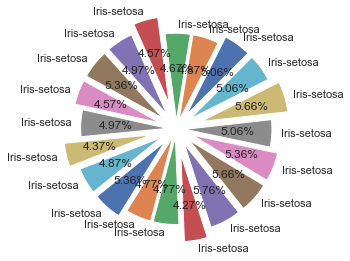

In [5]:
print('Data visualization\n')
def piechart(data):
    df1 = data[:20]
    explode=(0.2,0.1,0.1,0.3,0.2,0.2,0.2,0.1,0.3,0.2,0.2,
             0.1,0.1,0.3,0.2,
             0.2,0.2,0.1,0.3,0.2)
    print('Pie chart comparison\n')
    plt.pie(df1['sepal-length'],labels=df1['class'],explode=explode,startangle=45,
           autopct='%0.2f%%')
    plt.show()
print('\n')
piechart(data)

Count plots


Text(0.5, 1.0, 'sepal-length count')

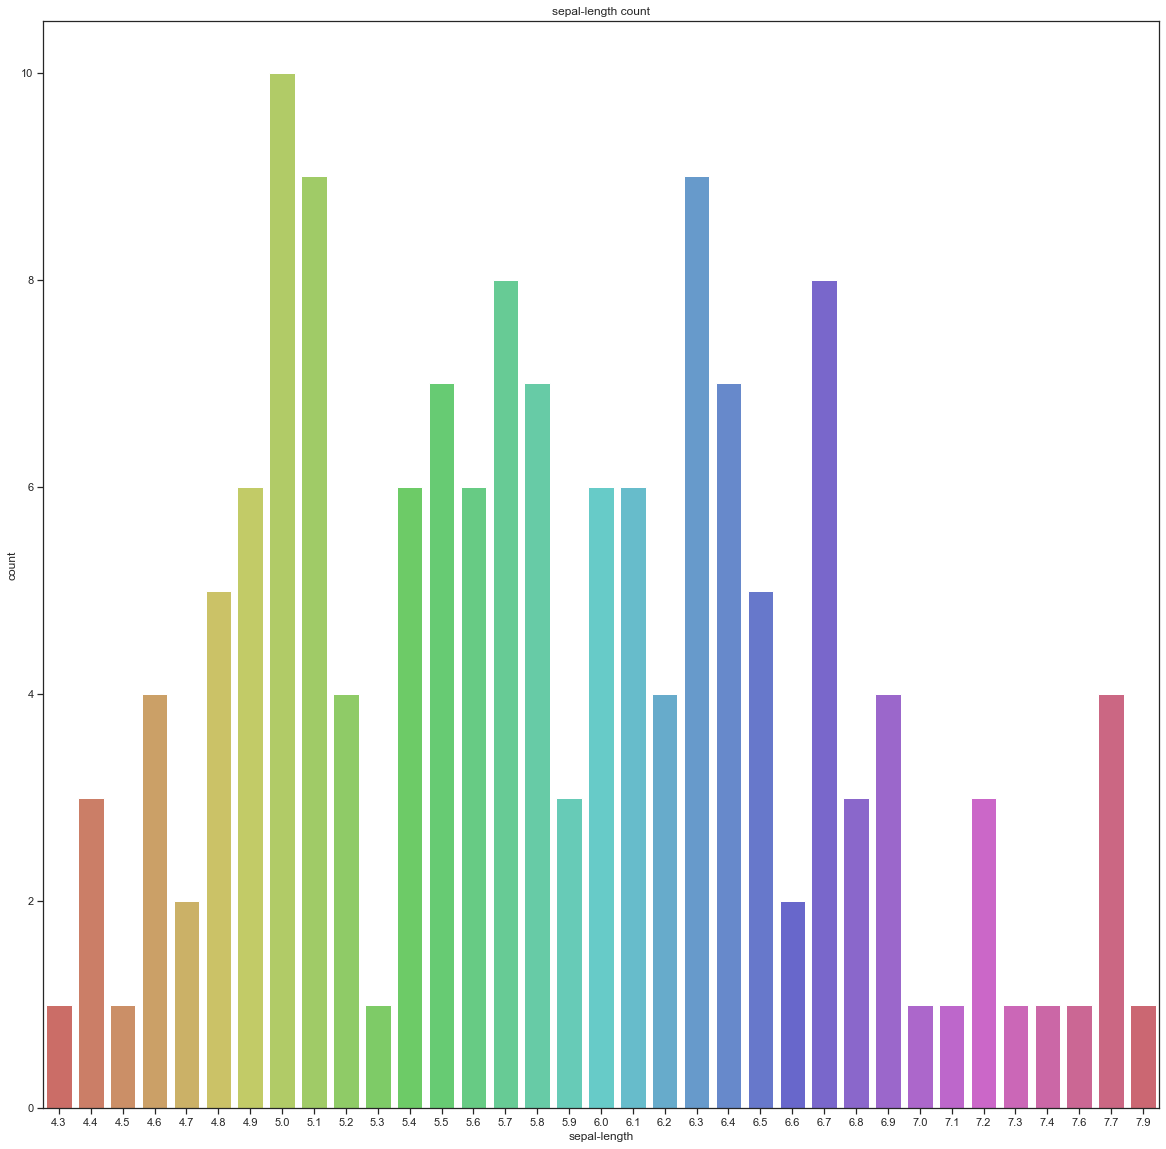

In [7]:
#Count plots
print('Count plots')
fig = plt.figure(221,figsize=(20,20))
sns.countplot(x=df['sepal-length'],data=df,palette='hls')
plt.title('sepal-length count')

Text(0.5, 1.0, 'sepal-width count')

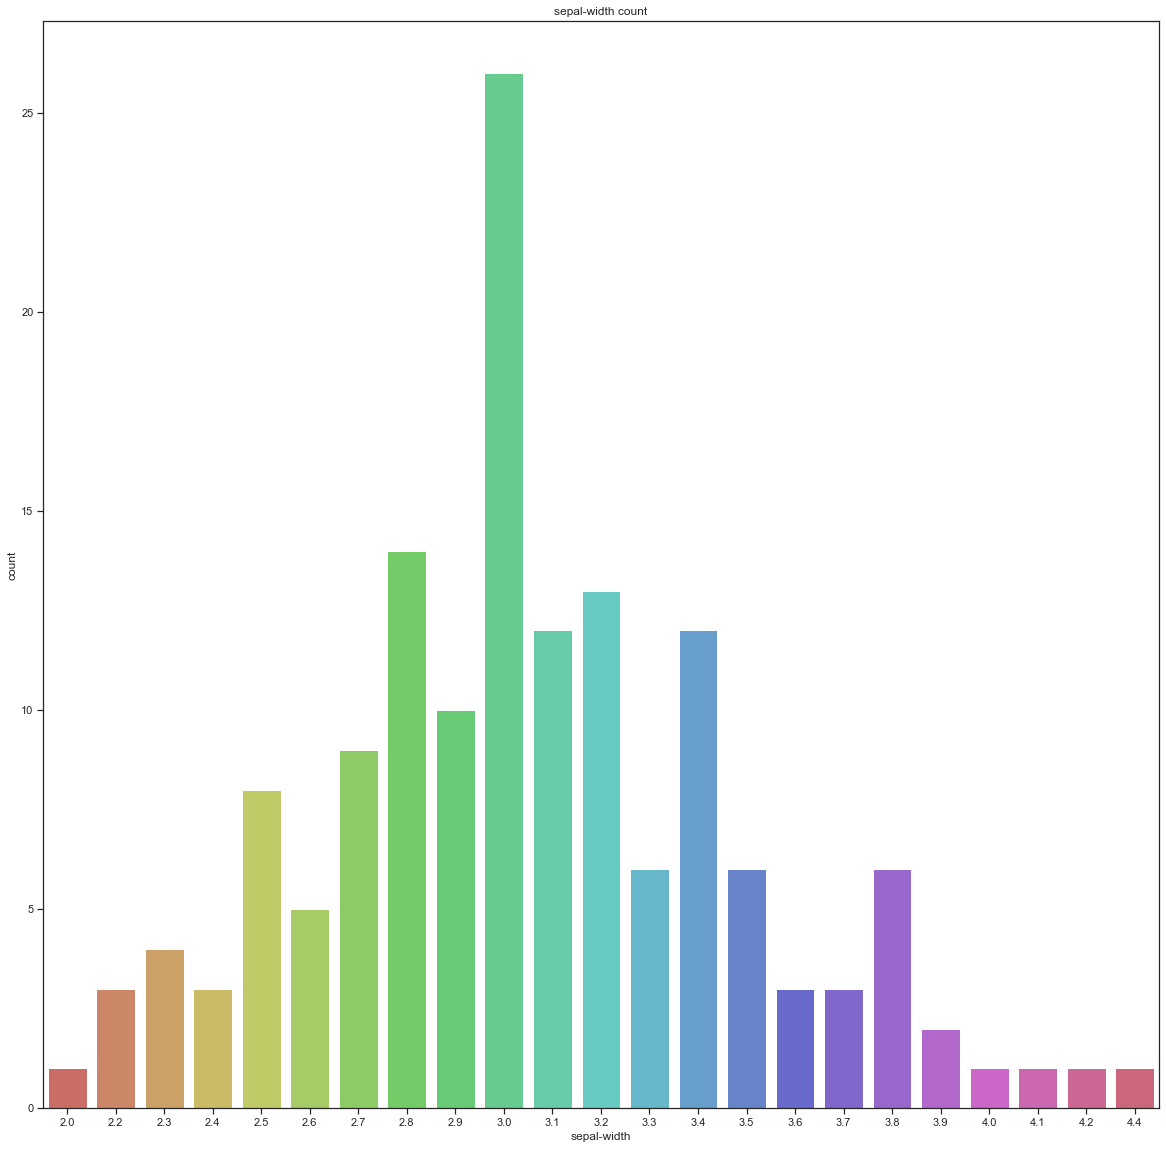

In [8]:
fig = plt.figure(222,figsize=(20,20))
sns.countplot(x=df['sepal-width'],data=df,palette='hls')
plt.title('sepal-width count')

Text(0.5, 1.0, 'petal-length count')

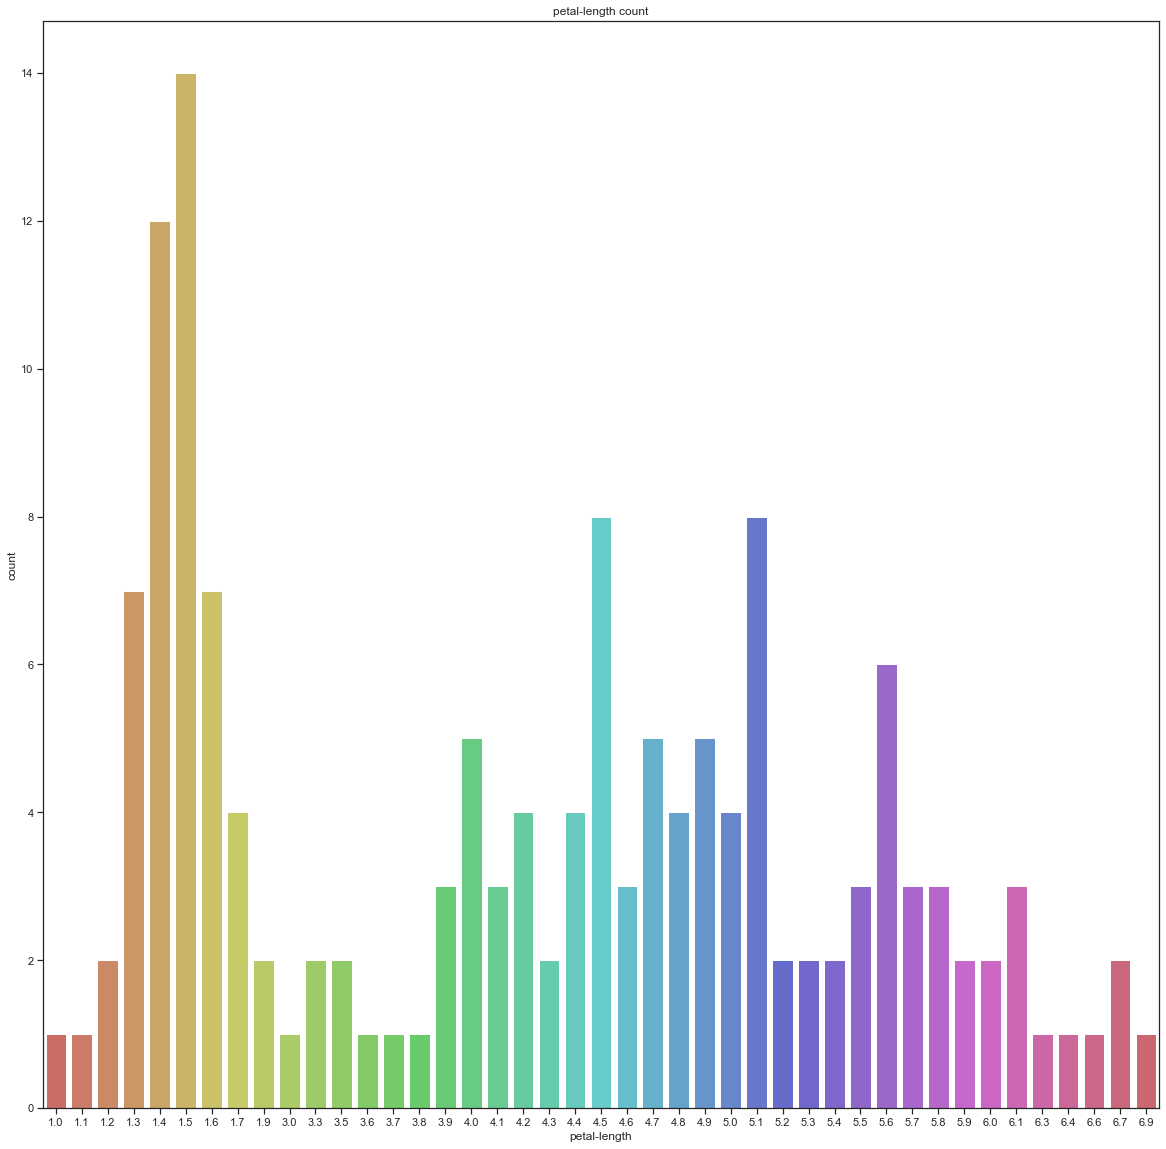

In [9]:
fig = plt.figure(223,figsize=(20,20))
sns.countplot(x=df['petal-length'],data=df,palette='hls')
plt.title('petal-length count')

Text(0.5, 1.0, 'petal-width count')

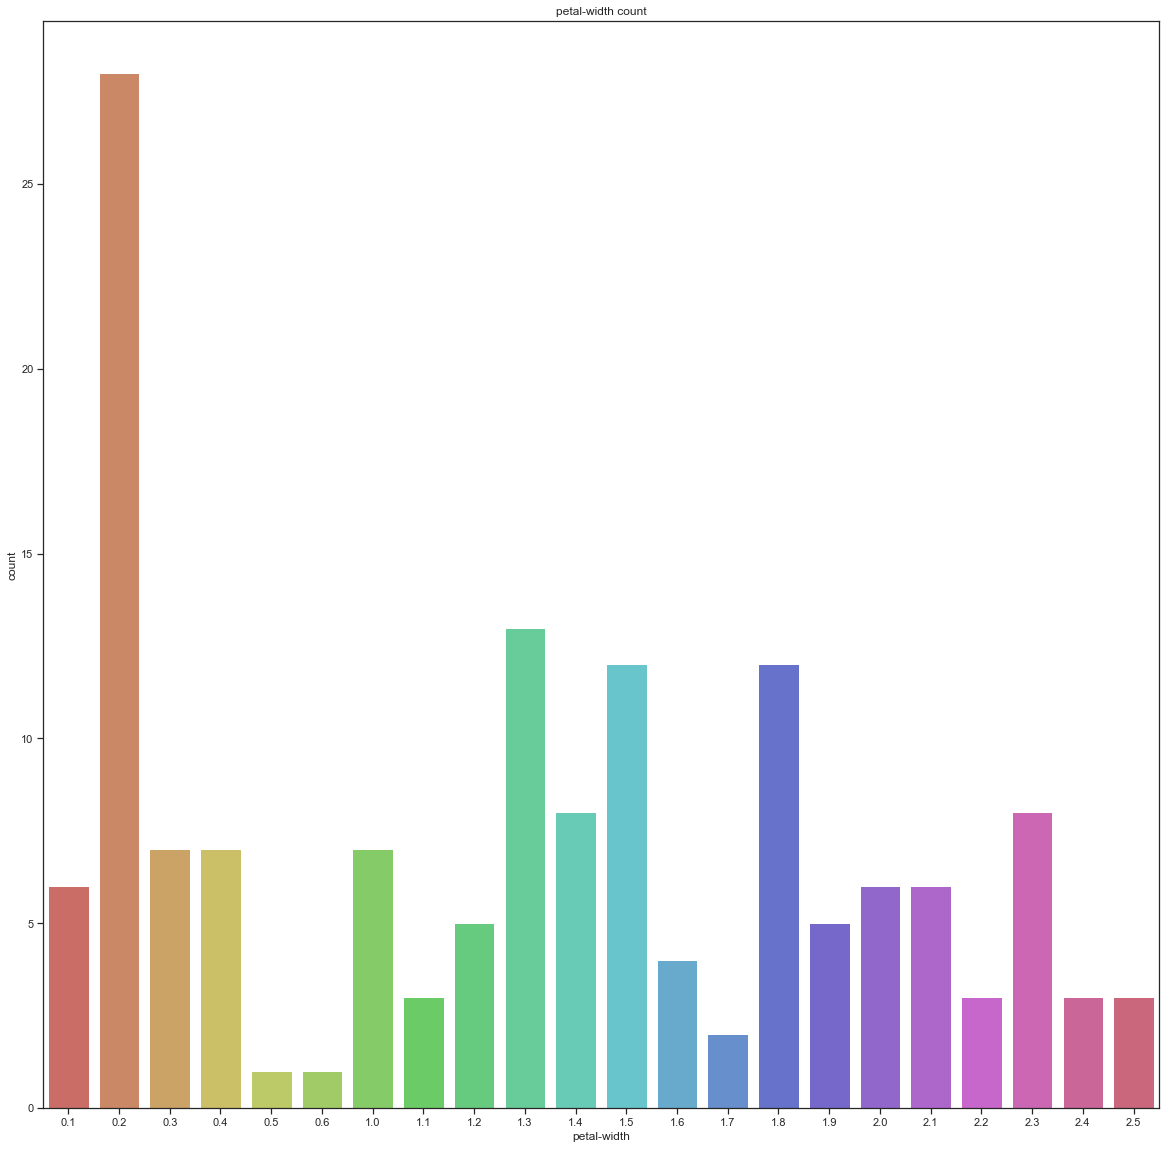

In [10]:
fig = plt.figure(221,figsize=(20,20))
sns.countplot(x=df['petal-width'],data=df,palette='hls')
plt.title('petal-width count')

In [15]:
#Hypothesis
#Non Parametric Test
print('\n')
print('Hypothesis Testing\n')
print('Mann-Whiteney Test results')
data1 = df['sepal-length']
data2= df['sepal-width']
stat , p = mannwhitneyu(data1,data2)
print('Statistics: ',stat,'\n','p-value: ',p)
alpha =0.05
if p>alpha:
    print('Same distribution(fail to reject H0)')
else:
    print('Different distribution (reject H0 and accepting H1)')



Hypothesis Testing

Mann-Whiteney Test results
Statistics:  2.5 
 p-value:  4.89868480774315e-51
Different distribution (reject H0 and accepting H1)


In [17]:
#Wilcoxon Test
print('\n')
print('Wilcoxon Test Results')
data1 = df['petal-length']
data2 = df['petal-width']
stat1 , p1 = wilcoxon(data1,data2)
print('Statistics: ',stat1,'\n','p-value: ',p1)
alpha =0.05
if p1>alpha:
    print('Same distribution(fail to reject H0)')
else:
    print('Different distribution (reject H0 and accepting H1)')



Wilcoxon Test Results
Statistics:  0.0 
 p-value:  2.244265490032842e-26
Different distribution (reject H0 and accepting H1)


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train,y_train)

y_pred = svclassifier.predict(X_test)

In [25]:
print('Support Vector Machine Results\n')
#Evaluating the results
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
a = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',round(a,2))
print('\n')
train_score = svclassifier.score(X_train,y_train)
print('Score of the train data: ',round(train_score,2))
print('\n')
test_score = svclassifier.score(X_test,y_test)
print('Score of the train data: ',round(test_score,2))

Support Vector Machine Results

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score: 1.0


Score of the train data:  0.98


Score of the train data:  1.0
